23 November

In this class we will revisit the UCI's heart disease dataset and predict the chances of a person getting heart disease. Before we start, let's first recall the attributes or columns of the dataset.

Data Description

The Heart Disease UCI dataset contains data collected on 14 different attributes by examining 303 patients. The dataset focuses only on differentiating patients having heart disease; labelled as value 1 and those not having heart disease; labelled as value 0. The 14 attributes (or columns) are as follows:


Name	Description
age	age in years
sex	sex (1 = male; 0 = female)
cp	chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
trestbps	resting blood pressure (in mm Hg on admission to the hospital)
chol	serum cholesterol in mg/dl
fbs	(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg	resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach	maximum heart rate achieved
exang	exercise induced angina (1 = yes; 0 = no)
oldpeak	ST depression induced by exercise relative to rest
slope	the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
ca	number of major vessels (0-3) colored by flourosopy
thal	3 = normal; 6 = fixed defect; 7 = reversable defect
target	1 = presence of heart disease; 0 = absence of heart disease
Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [1]:
#S1.1: Import the required modules and load the heart disease dataset. Also, display the first five rows.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#read the csv  file ans create the DataFrame
from google.colab import files
files.upload()

Saving heart.csv to heart.csv


{'heart.csv': b'\xef\xbb\xbfage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,226,

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#S1.2: Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
#S1.3: Print the number of records in each target label
print('Number of record in each label are')
print(df['target'].value_counts())

Number of record in each label are
1    165
0    138
Name: target, dtype: int64


The target variable target has two values: 0 and 1. This means that our dataset is composed of two classes or labels:

Class 0 - Patients NOT having heart disease
Class 1 - Patients having heart disease
Hence, this is a binary classification problem where the target attribute can have only two possible values (e.g. 0 and 1).

Before we proceed for EDA, let's create separate DataFrames for features and the target column.

Create a features_df DataFrame by dropping the target column from the original DataFrame.

Create a target_df DataFrame consisting of target values from the original DataFrame.

Also, print the shape of the features and target DataFrames.

In [5]:
#S1.4: create a separate DataFrames for features and target
features_df = df.drop('target', axis = 1)
target_df = df['target']

#Print shape of features and target DataFrames
print(features_df.shape)
print(target_df.shape)

(303, 13)
(303,)


# **Activity 2: EDA and Train-Test Split**
In one of the previous lessons, we had already performed the exploratory data analysis in detail for the dataset. Hence, here let's check for data distribution, outliers, and correlation among the features.

From the dataset description and DataFrame, it is clear that the features: age, trestbps, chol, thalach, oldpeak are continuous numeric features whereas various rest of the features are categorical with feature cp having 4 unique values.

Create boxplots for the continuous numeric features (age, trestbps, chol, thalach, oldpeak) with respect to the sex of the patient while setting the hue = 'target' using subplots.

create countplot for cp showing the number of values for each target label by setting hue = 'target'.

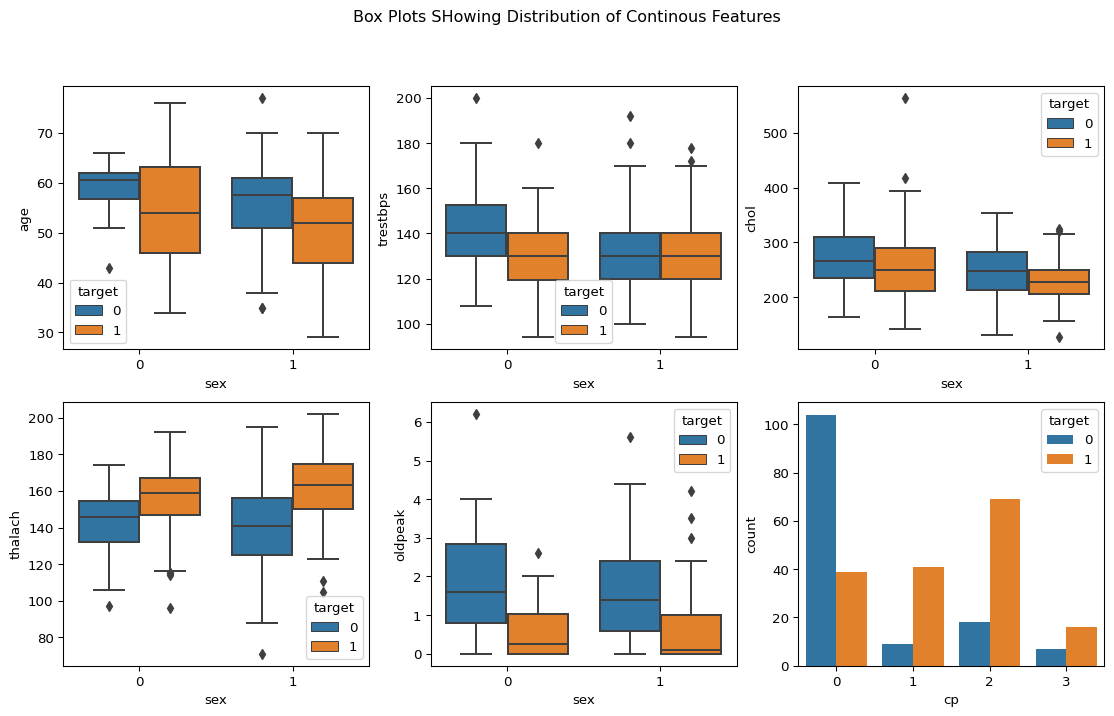

In [6]:
#S2.1: Obtain the boxplot for continous features
#prepare a subplot with rows = 2 and columns = 3
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 8), dpi = 96, sharey = False)

#Bosplot 'age' vs 'sex' with hue = 'target' in (0, 0) axis
sns.boxplot(y = 'age', x = 'sex', hue = 'target', data = df, ax = axis[0, 0])

#Boxplot 'age' vs 'trestbps' with hue = 'target' in (o, 1) axis
sns.boxplot(y = 'trestbps', x = 'sex', hue = 'target', data = df, ax = axis[0, 1])

#Boxplot 'age' vs 'chol' with hue = 'target' in (0,2) axis
sns.boxplot(y = 'chol', x = 'sex', hue = 'target', data = df, ax = axis[0, 2]) 

#Boxplot age vs thalach with hue = target in (0, 2) axis
sns.boxplot(y = 'thalach', x = 'sex', hue = 'target', data = df, ax = axis[1, 0])

#Box plot age vs oldpeak with hue = target in (1,1) axis
sns.boxplot(y = 'oldpeak', x = 'sex', hue = 'target', data = df, ax = axis[1, 1]) 

#Count plot of cp with hue = 'target in (1, 2) axis
sns.countplot(x = 'cp', hue = 'target', data = df, ax = axis[1, 2]) 
fig.suptitle('Box Plots SHowing Distribution of Continous Features')
plt.show()

Here we observe there are no significant outliers in the dataset. Also, we observe that the majority of the cp values are 0.

Next, let's explore the correlation matrix for the entire dataset to see which features contribute higher towards a patient exhibiting probability of heart disease.

24 November

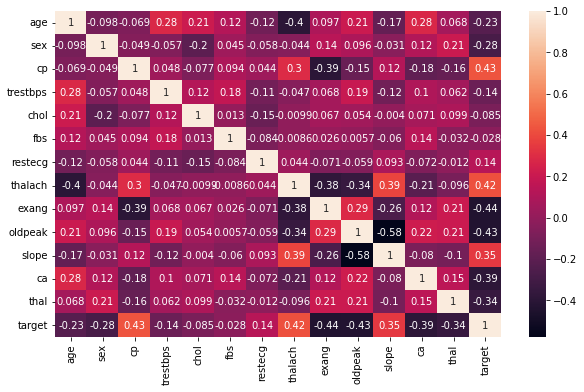

In [7]:
# S2.2: Obtain the correlation heatmap
corr_df = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Of the 13 features in the dataset features: cp, thalach, slope show highest positive correlation and the feaures: exang, oldpeak, ca, thal show highest negative correlation with target. Surprisingly, cholesterol (chol) does not exhibit a higher correlation value.

Before we proceed with the classifier design let's split the dataset into train-test sets.

In [9]:
# S2.3: Import train_test_split function

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.3, random_state=42, stratify = target_df)

#shape of train and test sets.
print('Print of X_train:', X_train.shape)
print('Print of X_test:', X_test.shape)
print('Print of y_train:', X_train.shape)
print('Print of y_test:', y_test.shape)


Print of X_train: (212, 13)
Print of X_test: (91, 13)
Print of y_train: (212, 13)
Print of y_test: (91,)


# **Activity 3: Naive Bayes Classifier**
Naive Bayes is a simple algorithm which falls under Supervised Learning technique. Why is it called Naive Bayes?

Naive: It is called naive as it is based on a simple assumption that all the features of dataset are mutually independent.

Bayes: It is based on Bayes Theorem.


Bayes theorem is based on Conditional Probability which states that something will happen, given that something else has already occurred. By using conditional probability, we can find out the probability of an event will occur given the knowledge of the previous event.

Calculating conditional probability is as simple as predicting the chances of Lionel Messi scoring a goal based on his form (goals scored in recent matches) and opponent team.


Mathematically Bayes' theorem can be expressed as:



In [10]:
#S3.1: Create a Naive BAyes CLassifier

#Import the required library
from sklearn.naive_bayes import GaussianNB

#modeling the NB classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

#predicting the train and test set
y_train_predict_nb = nb_clf.predict(X_train)
y_test_predict_nb = nb_clf.predict(X_test)

#eveluating accuracy scores
print('Accuracy on the training set: {:.2f}'.format(nb_clf.score(X_train, y_train)))
print('Accuracy on the test set: {:.2f}'.format(nb_clf.score(X_test, y_test)))

Accuracy on the training set: 0.86
Accuracy on the test set: 0.79


              precision    recall  f1-score   support

           0       0.81      0.71      0.75        41
           1       0.78      0.86      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.78      0.79        91
weighted avg       0.79      0.79      0.79        91



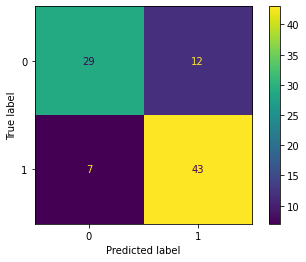

In [11]:
#S3.2: Obtain the confusion matrix for the classifier
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import plot_confusion_matrix, classification_report

plot_confusion_matrix(nb_clf, X_test, y_test, values_format = 'd')
print(classification_report(y_test, y_test_predict_nb))

The accuracy scores, precision, recall and f1-score seems promising for the test dataset with a total of only  misclassified cases.

Next let us build a logistic regression based classifier to set a benchmark for performance.



# **Activity 4: Logistic Regression**
Before we proceed with classifier design, let's normalise the dataset. Before that, let us obtain a list of features that contain only two unique values i.e. 0 and 1.

In [12]:
#T4.1: Obtain a list of discreate features
discreate_features = []
for feature in features_df.columns:
  if feature in features_df.columns:
    if features_df[feature].nunique() < 3:
      discreate_features.append(feature)

print('Discreate Features:', discreate_features)
print('Count of Discreate features:', len(discreate_features))

Discreate Features: ['sex', 'fbs', 'exang']
Count of Discreate features: 3


Hence, 3 discrete features contains only two unique values 0 and 1. We will use StandardScaler to scale all the feature variables excluding these 3 discrete features as their values already lie in the range [0, 1].

In [13]:
#T4.2:Normalise the feature values
from sklearn.preprocessing import StandardScaler

continous_features = features_df.drop(discreate_features, axis = 1)

standard_scaler = StandardScaler()
scaled_features = standard_scaler.fit_transform(continous_features)
X_cont_scaled = pd.DataFrame(scaled_features)
X_cont_scaled.columns = continous_features.columns
X_cont_scaled.head()

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal
0,0.952197,1.973123,0.763956,-0.256334,-1.005832,0.015443,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,1.002577,-0.092738,0.072199,0.898962,1.633471,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,0.032031,-0.092738,-0.816773,-1.005832,0.977514,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.032031,-0.663867,-0.198357,0.898962,1.239897,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-0.938515,-0.663867,2.082050,0.898962,0.583939,-0.379244,0.976352,-0.714429,-0.512922


In [14]:
#S4.1: Concatenate the scaled continous features with discreate features.

X_scaled = pd.concat([X_cont_scaled, features_df[discreate_features]], axis = 1)
X_scaled

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal,sex,fbs,exang
0,0.952197,1.973123,0.763956,-0.256334,-1.005832,0.015443,1.087338,-2.274579,-0.714429,-2.148873,1,1,0
1,-1.915313,1.002577,-0.092738,0.072199,0.898962,1.633471,2.122573,-2.274579,-0.714429,-0.512922,1,0,0
2,-1.474158,0.032031,-0.092738,-0.816773,-1.005832,0.977514,0.310912,0.976352,-0.714429,-0.512922,0,0,0
3,0.180175,0.032031,-0.663867,-0.198357,0.898962,1.239897,-0.206705,0.976352,-0.714429,-0.512922,1,0,0
4,0.290464,-0.938515,-0.663867,2.082050,0.898962,0.583939,-0.379244,0.976352,-0.714429,-0.512922,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-0.938515,0.478391,-0.101730,0.898962,-1.165281,-0.724323,-0.649113,-0.714429,1.123029,0,0,1
299,-1.033002,1.973123,-1.234996,0.342756,0.898962,-0.771706,0.138373,-0.649113,-0.714429,1.123029,1,0,0
300,1.503641,-0.938515,0.706843,-1.029353,0.898962,-0.378132,2.036303,-0.649113,1.244593,1.123029,1,1,0
301,0.290464,-0.938515,-0.092738,-2.227533,0.898962,-1.515125,0.138373,-0.649113,0.265082,1.123029,1,0,1


In [15]:
#S4.2: Split dataset into training set and test set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, target_df, test_size=0.3, random_state = 42, stratify=target_df)

#print the shape of train and test sets.
print('Print of X_train:', X_train.shape)
print('Print of X_test:', X_test.shape)
print('Print of y_train:', X_train.shape)
print('Print of y_test:', y_test.shape)


Print of X_train: (212, 13)
Print of X_test: (91, 13)
Print of y_train: (212, 13)
Print of y_test: (91,)


1. Import the required library which contains methods and attributes to design the classifier.

from sklearn.linear_model import LogisticRegression

2.Create an object (say lg_clf) of the LogisticRegression() constructor and set max_iter = 1000.

3. Call the fit() function on the above constructor with train features and target variables as inputs.

4. Get the predicted target values for both train and test sets by calling the predict() function on lg_clf.

5. Get the accuracy score on both train and test sets by calling the score() function on the classifier object.

In [16]:
#S4.3: Create a multivariate logistic Regression model, also predict the target values for the train set.

from sklearn.linear_model import LogisticRegression
lg_clf= LogisticRegression(max_iter = 1000)
lg_clf.fit(X_train2, y_train2)

#Predicting the train and test sets
y_train_predict_lg = lg_clf.predict(X_train2)
y_test_predict_lg = lg_clf.predict(X_test2)

#evaluating accuracy scores
print('Accuracy on the training set: {:.2f}'.format(lg_clf.score(X_train2, y_train2)))
print('Accuracy on the test set: {:.2f}'.format(lg_clf.score(X_test2, y_test2)))


Accuracy on the training set: 0.88
Accuracy on the test set: 0.76


              precision    recall  f1-score   support

           0       0.76      0.68      0.72        41
           1       0.76      0.82      0.79        50

    accuracy                           0.76        91
   macro avg       0.76      0.75      0.75        91
weighted avg       0.76      0.76      0.76        91



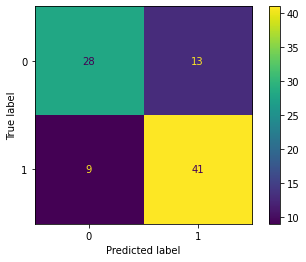

In [17]:
#S4.4: Obtain the confusion matrix and classification report.
plot_confusion_matrix(lg_clf, X_test2, y_test2, values_format = 'd')
print(classification_report(y_test2, y_test_predict_lg))

28 November

Activity 5: kNN Classifier

For kNN classifier, let's find a value of  which can give a good train and test set accuracy. For this, we can determine the accuracy scores for neighbours from 1 to 20 and plot these scores using the steps given below:

1. Import the required library:
from sklearn.neighbors import KNeighborsClassifier

2. Create two lists acc_train and acc_test to store the accuracy scores of train set and test set for various  values.

3. Initiate a for loop that ranges from 1 to 21 with the current iterator stored in variable k. Inside this for loop:

~ Create an object of KNeighborsClassifier class with n_neighbors = k as input.

~ Call the fit() function using the object of KNeighborsClassifier class and pass train set as inputs to this function.

~ Determine the train set and test set accuracy scores for current k value and append these scores to the acc_train and acc_test lists respectively.

4. Visualise the values of acc_train and acc_test lists using line plots.

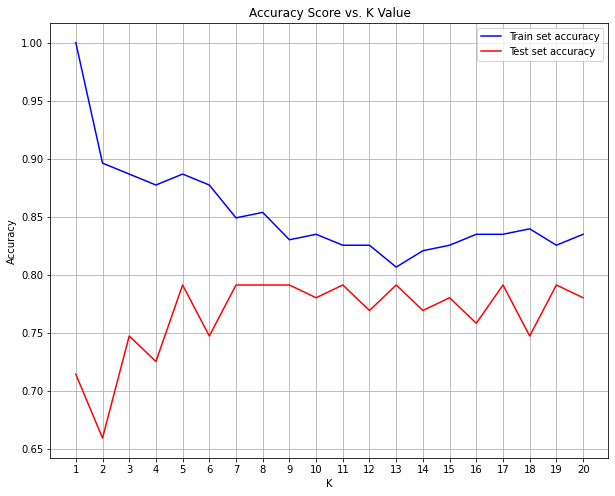

In [20]:
#S5.1: Plot the accuracy scores of train and tests for 1 to 20 neighbors.
from sklearn.neighbors import KNeighborsClassifier

# Define the empty lists
acc_train = []
acc_test= []

# Modeling the kNN classifier for k neighbors
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train2, y_train2)
    acc_train.append(knn.score(X_train2, y_train2))
    acc_test.append(knn.score(X_test2, y_test2))
    
# Plotting the accuracy scores    
plt.figure(figsize = (10, 8))
plt.grid()
plt.xticks(range(1, 21, 1))
plt.plot(range(1, 21), acc_train, color= 'blue', label = "Train set accuracy")
plt.plot(range(1, 21), acc_test, color= 'red', label = "Test set accuracy")      
plt.title('Accuracy Score vs. K Value')
plt.legend()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

You may observe that with an increase in the number of neighbours, train set accuracy decreases whereas test set accuracy increases. As test set accuracy is a better estimate than train set accuracy for unseen data, we can say that 13  is an optimal value for k. As beyond k = 13 the test set accuracy also starts to decrease.

Let us now deploy the kNN classifier model for k = 13 and evaluate the performance of this model.

In [21]:
#S5.2: Modelling the kNN Classifier

knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train2, y_train2)

#predicting the train and test sets
y_train_predict_knn = knn.predict(X_train2)
y_test_predict_knn = knn.predict(X_test2)

#Evaluating accuracy scores
print('Accuracy on the training set: {:.2f}'.format(knn.score(X_train2, y_train2)))
print('Accuracy on the training set: {:.2f}'.format(knn.score(X_test2, y_test2)))


Accuracy on the training set: 0.81
Accuracy on the training set: 0.79


              precision    recall  f1-score   support

           0       0.84      0.66      0.74        41
           1       0.76      0.90      0.83        50

    accuracy                           0.79        91
   macro avg       0.80      0.78      0.78        91
weighted avg       0.80      0.79      0.79        91



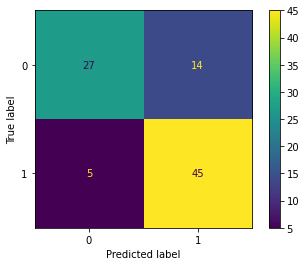

In [23]:
#S5.3: Obtain the COnfusion matrix for the classifier 

plot_confusion_matrix(knn, X_test2, y_test2, values_format = 'd')
print(classification_report(y_test2, y_test_predict_knn))

The accuracy scores, precision, recall and f1-score are best with only a total of 14 + 5 = 19 misclassified cases.

To further analyse the classifier performance let's obtain the AUC score and plot the ROC curves for the classifiers.



#**Activity 6: Model Evaluation - ROC curve**

Let's obtain the AUC score and plot the ROC curve for the classifiers. For this:

Import the required library:
from sklearn.metrics import roc_auc_score

Obtain the AUC scores for all the three classifiers by calling the roc_auc_score() function and passing test target variable and its predicted value as inputs.

In [22]:
#S6.1: Obtain the AUC Scores for the Classifier
#Import 'roc_auc_score' from sklearn.metrics
from sklearn.metrics import roc_auc_score

#Predict the score of the test test sets using 'roc_auc_score' for NB Classifier
roc_nb = roc_auc_score(y_test2, y_test_predict_nb)
print('AUC Score for Naive Bayes CLassifier: {:.2f}%'.format(roc_nb))

#predict the score of the test using 'roc_auc_score' for kNN classifier
roc_lg = roc_auc_score(y_test2, y_test_predict_lg)
print('AUC Score for Logistic Regression Classifier: {:.2f}%'.format(roc_lg))

#Predict the score of the test sets using 'roc_auc_score' for kNN Classifier
roc_knn = roc_auc_score(y_test2, y_test_predict_knn)
print('AUC Score for kNN Classifier: {:.2f}%'.format(roc_knn))

AUC Score for Naive Bayes CLassifier: 0.78%
AUC Score for Logistic Regression Classifier: 0.75%
AUC Score for kNN Classifier: 0.78%


Both kNN and Naive Bayes classifier exhibits same highest AUC score followed by Logistic Regression classifier.


Next plot the ROC curve for the classifiers using the steps given below:

Import the required library:
from sklearn.metrics import roc_curve

Unpack the fpr, tpr, and threshold values for the classifiers using roc_curve() function.

For baseline , Set x = [0, 1], y = [0, 1], linestyle = '--', and label = 'Baseline'

Plot the ROC curves for all the classifiers and set different colors for them to have a good readability.

Provide the relevant title to the plot; label the x, y axes; and insert legends to the graphs.

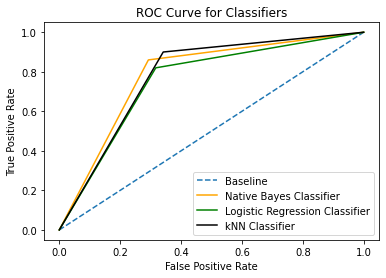

In [24]:
#S6.2: Plot the ROC curve for the classifiers
#import 'roc_curve' from sklearn.metrics
from sklearn.metrics import roc_curve

#obtain 'fpr', 'tpr' and threshold values for NB Classifier using 'roc_curve' function
fpr_nb, tpr_nb, threshold_nb = roc_curve(y_test2, y_test_predict_nb)

#obtain 'fpr', 'tpr' and threshold values for Logistic R-egression Classifier  using 'roc_curve' function
fpr_lg, tpr_lg, threshold_lg = roc_curve(y_test2, y_test_predict_lg)

#obtain 'fpr', 'tpr' and threshold values for kNN Classifier using 'roc_curve' function
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test2, y_test_predict_knn)

#plot roc curves along with a baseline
plt.plot([0, 1], [0,1], linestyle = '--', label = 'Baseline')
plt.plot(fpr_nb, tpr_nb, color = 'orange', label = 'Native Bayes Classifier')
plt.plot(fpr_lg, tpr_lg, color = 'green', label = 'Logistic Regression Classifier')
plt.plot(fpr_knn, tpr_knn, color = 'black', label = 'kNN Classifier')

plt.title('ROC Curve for Classifiers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

From the ROC curve and confusion matrix we can observe that the kNN classifier exhibits best result (as it has highest tpr) followed by Naive Bayes classifier and lastly the Logistic Regression classifier.

Key points to remember💭

However, with kNN classifier the computing time is high as we need to obtain the optimal value of  neighbours for which the classifier exhibits the best performance.

The data normalisation is almost a mandatory process for most of the classifiers, however for the Naive Bayes classifier we didn't normalise the dataset as for GaussianNB the data normalisation is an internal process.


Let's stop here. In the next class, we will understand the working of Naive Bayes classifier with a relatively simple example and explore the underlying mathematics behind the Bayes theorem.

In [25]:
# Continued on ML: Naive Bayes Classifier using Game dataset